# 210409 Fix Component 13

In [1]:
const COMPONENT = 13;

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-1878089568305949938\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12747650859451231800\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-1878089568305949938\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

,id,ncbi_id,name,rank,parent_id,in_v12,manual_threshold,report,ngenomes,comp_idx,diameter,outgoing,incoming,name_abbr
,Int64,Int64?,String,String?,Int64?,Bool,Float64,Bool,Int64,Int64,Float32,Int64,Int64,SubStri…
1,624,554,Pectobacterium carotovorum,species,368,1,NaN,1,9,1,0.753825,2,1,carotovorum
2,702,180957,Pectobacterium brasiliense,species,368,1,NaN,1,22,2,0.680234,1,1,brasiliense
3,1497,78398,Pectobacterium odoriferum,species,368,1,NaN,1,2,3,0.328923,0,1,odoriferum


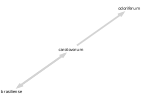

data: [
  "heatmap with fields colorscale, type, x, y, and z",
  "scatter with fields hoverinfo, marker, mode, type, x, and y"
]

layout: "layout with fields height, margin, width, and xaxis"

In [2]:
include("fix-component-base.jl");

In [3]:
trees = Dict{String, Any}();

In [4]:
trees["all"] = cluster_annotate(cdata, 1:cdata.ntaxa)
plot(dendrogram(cdata, trees["all"]))

data: [
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields fill, hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields fill, hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields fill, hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields fill, hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields fill, hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields fill, hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields fill, hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields hoverinfo, line, mode, showlegend, type, x, y, and yaxis",
  "scatter with fields customdata, hovertemplate, marker, mode, showlegend, type, x, y, and yaxis",
  "heatmap with fields colorscale, customdata, hovertemplate, showscale, type, x, xgap, yaxis, z, zmax, and zmin"
]

layout: "layout with fields hovermode, margin, xaxis, and yaxis2"

## Edits

### carotovorum

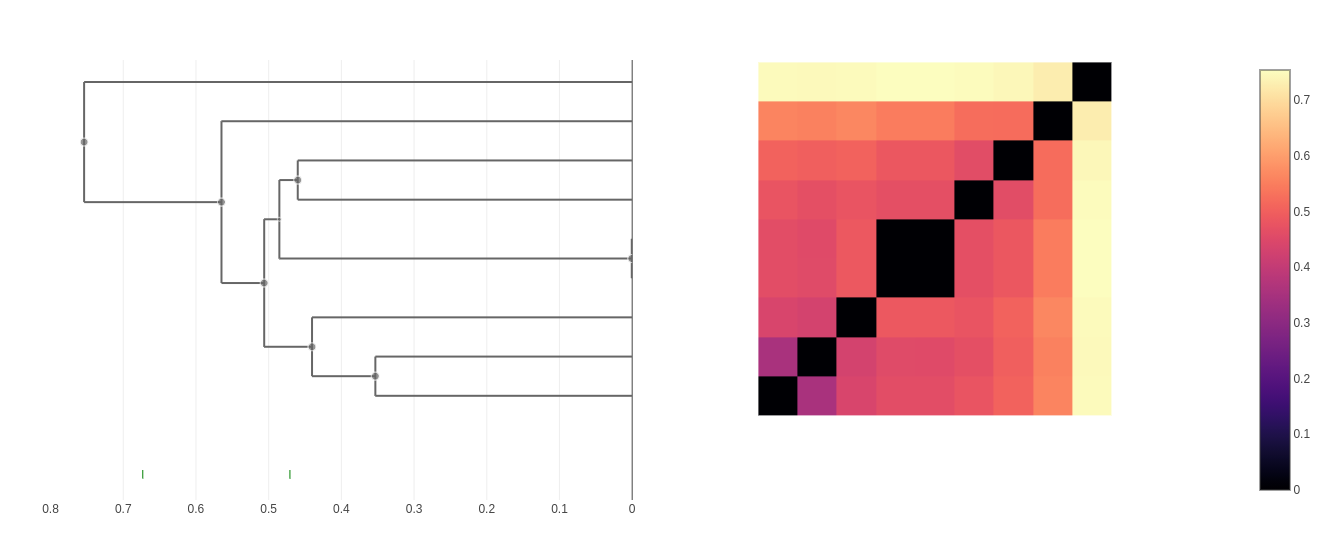

In [5]:
let taxon = "carotovorum"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [6]:
keep_subtrees!(edits, trees["carotovorum"], 16)

#1 carotovorum:
	1/9 removed
	Diameter 0.7538 => 0.5649


## Finish

In [7]:
complete_edits(edits)

,index,name,ngenomes,initial_diameter,taxon_removed,removed_genomes,split,manual_threshold,final_diameter
,Int64,SubStri…,Int64,Float32,Bool,Int64,String,Missing,String
1,1,carotovorum,9,0.753825,0,1,,missing,0.5649
